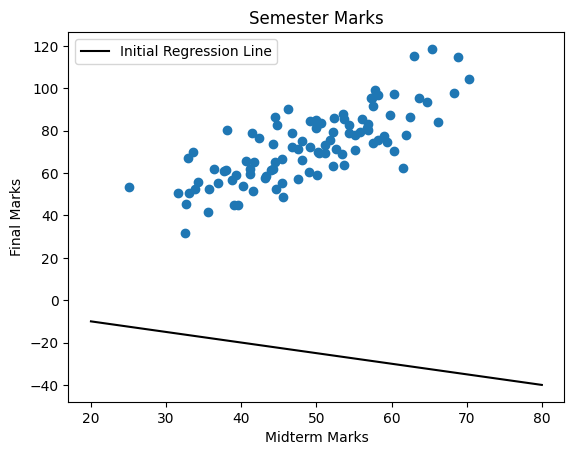

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("https://raw.githubusercontent.com/yoga-suhas-km/Intelligent_systems/main/marks_dataset.csv") # Student marks data set

mid = data["Midterm mark"] # Set Midterm Column

final = data["Final mark"] # Set Final Column

# Initialize m=−0.5,b=0 and α=0.0001
a = 0.0001 # Learning Rate
m = -0.5 # Slope
b = 0 # intercept

# Show the datapoints from the student marks data set in a figure where the x-axis is midterm
# mark and the y-axis is the final mark
# Show the initial regression line on the same figure (m=−0.5,b=0)

plt.scatter(mid,final) # Displays midterm and final marks on a scatter plot

sampleX = np.linspace(20,80,100)
initRegLine = m * sampleX + b # y = mx+b
plt.plot(sampleX, initRegLine, label = "Initial Regression Line", color = "black")
plt.title("Semester Marks")
plt.xlabel("Midterm Marks")
plt.ylabel("Final Marks")
plt.legend()
plt.show()



## Average and Standard Deviation

In [ ]:
# Calculate the average and standard deviation for Midterm mark
midAverage = np.mean(mid)
midDeviation = np.std(mid)

print("Midterm Average: ", midAverage)
print("Midterm Standard Deviation: ", midDeviation)


# Calculate the average and standard deviation for Final mark
finalAverage = np.mean(final)
finalDeviation = np.std(final)

print("Final Average: ", finalAverage)
print("Final Standard Deviation: ", finalDeviation)


Midterm Average:  48.959
Midterm Standard Deviation:  9.697639867514155
Final Average:  72.735
Final Standard Deviation:  16.574748112716527


##Standardization

In [ ]:
# Standardization
def Standardization(data, average, std):
  return (data - average) / std

standardizedMid = Standardization(mid, midAverage, midDeviation)
print("Standardized Midterm Marks:\n", standardizedMid)

standardizedFinal = Standardization(final, finalAverage, finalDeviation)
print("Standardized Final Marks:\n", standardizedFinal)


Standardized Midterm Marks:
 0    -1.697217
1     0.457946
2     1.293201
3    -0.150449
4     1.117901
        ...   
95    0.107346
96    0.024851
97    0.107346
98   -0.088578
99   -2.460289
Name: Midterm mark, Length: 100, dtype: float64
Standardized Final Marks:
 0    -2.475754
1    -0.237409
2    -0.611472
3    -0.074511
4     0.872713
        ...   
95    0.528816
96   -0.038311
97    0.752048
98   -0.394274
99   -1.160500
Name: Final mark, Length: 100, dtype: float64


## Error (Cost Function)

In [ ]:
def errorCost(final,mid,m,b, length):

  #error = np.sum((final - (m * mid + b))**2)
  #cost = error / length
  cost = np.mean((final - (m * mid + b))**2)
  return cost




## Gradient Partial Derivatives

In [ ]:
def gradientM(final,mid,m,b):
  gradM = 0

  for x in range(len(mid)):
    gradM += (-mid[x]*(final[x]-(m*mid[x]+b)))

  gradM = gradM * (2/len(mid))

  return gradM


def gradientB(final,mid,m,b):
  gradB = 0

  for x in range(len(mid)):
    gradB += (-(final[x]-(m*mid[x]+b)))

  gradB = gradB * (2/len(mid))

  return gradB


## Updating *m* and *b* using a learning rate *α*

In [ ]:
def updateM(final,mid,m,b,a):
  newM = m - a* gradientM(final,mid,m,b)
  return newM

def updateB(final,mid,m,b,a):
  newB = b - a* gradientM(final,mid,m,b)
  return newB

## Standardized 100 Iterations

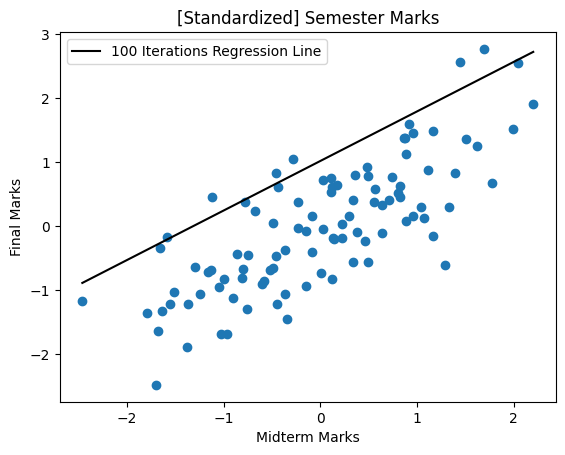

In [ ]:
m = -0.5
b = 0
for x in range(100):
  m = updateM(standardizedFinal, standardizedMid,m,b, 0.1)
  b = updateB(standardizedFinal, standardizedMid,m,b, 0.1)


plt.scatter(standardizedMid, standardizedFinal)  # Displays standardized midterm and final marks on a scatter plot
sampleX = np.linspace(min(standardizedMid),max(standardizedMid),100)
initRegLine = m * sampleX + b # y = mx+b
plt.plot(sampleX, initRegLine, label = "100 Iterations Regression Line", color = "black")
plt.title("[Standardized] Semester Marks")
plt.xlabel("Midterm Marks")
plt.ylabel("Final Marks")
plt.legend()
plt.show()

## Standardized 100 Iterations Error

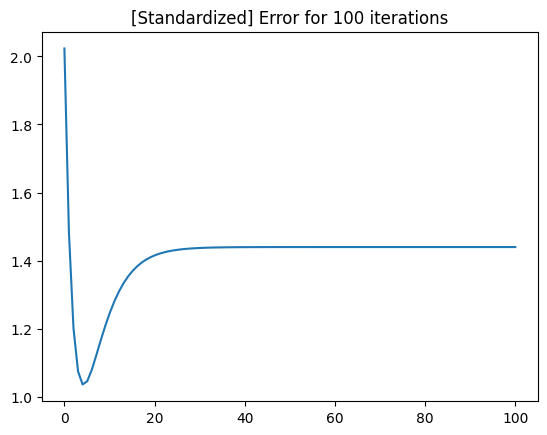

In [ ]:
errorArray = []
m = -0.5
b = 0
for x in range(100):
  errorArray.append(errorCost(standardizedFinal, standardizedMid,m,b,len(standardizedMid)))

  m = updateM(standardizedFinal, standardizedMid,m,b,0.1)
  b = updateB(standardizedFinal, standardizedMid,m,b,0.1)

errorX = np.linspace(0,100,100)
plt.plot(errorX, errorArray)
plt.title("[Standardized] Error for 100 iterations")
plt.show()

## Standardized 2000 Iterations

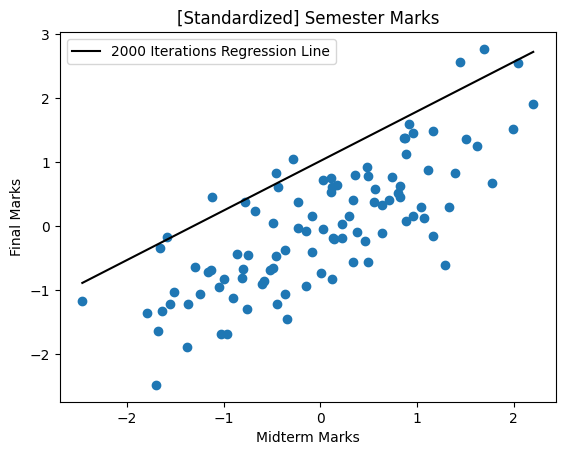

In [ ]:
m = -0.5
b = 0
for x in range(2000):
  m = updateM(standardizedFinal, standardizedMid,m,b,0.1)
  b = updateB(standardizedFinal, standardizedMid,m,b,0.1)


plt.scatter(standardizedMid, standardizedFinal)  # Displays standardized midterm and final marks on a scatter plot
sampleX = np.linspace(min(standardizedMid),max(standardizedMid),100)
initRegLine = m * sampleX + b # y = mx+b
plt.plot(sampleX, initRegLine, label = "2000 Iterations Regression Line", color = "black")
plt.title("[Standardized] Semester Marks")
plt.xlabel("Midterm Marks")
plt.ylabel("Final Marks")
plt.legend()
plt.show()

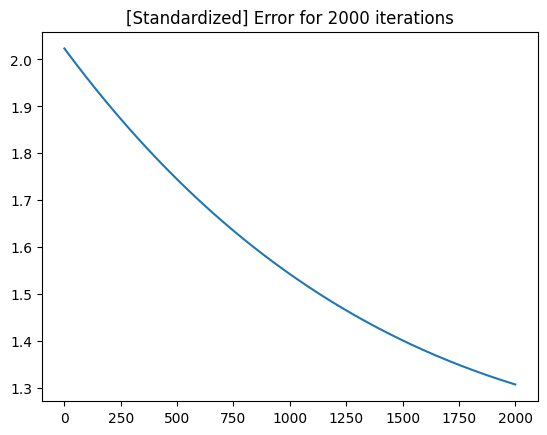

In [ ]:
errorArray = []
m = -0.5
b = 0
for x in range(2000):
  errorArray.append(errorCost(standardizedFinal, standardizedMid,m,b,len(standardizedMid)))

  m = updateM(standardizedFinal, standardizedMid,m,b,0.0001)
  b = updateB(standardizedFinal, standardizedMid,m,b,0.0001)

errorX = np.linspace(0,2000,2000)
plt.plot(errorX, errorArray)
plt.title("[Standardized] Error for 2000 iterations")
plt.show()

## Non-Standardized 100 Iterations

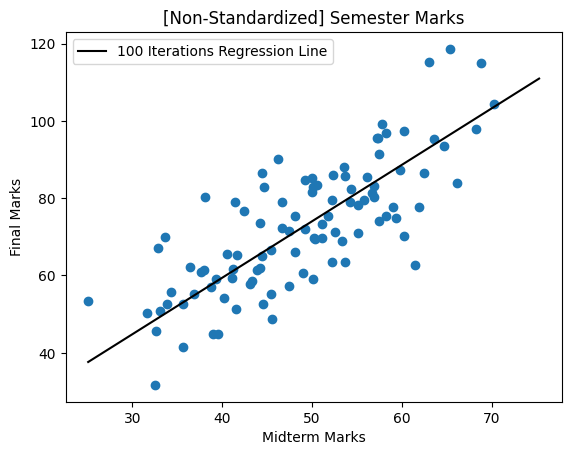

In [ ]:
m = -0.5
b = 0
for x in range(100):
  m = updateM(final, mid,m,b,0.0001)
  b = updateB(final, mid,m,b,0.0001)


plt.scatter(mid, final)  # Displays standardized midterm and final marks on a scatter plot
sampleX = np.linspace(min(mid),max(mid+5),100)
initRegLine = m * sampleX + b # y = mx+b
plt.plot(sampleX, initRegLine, label = "100 Iterations Regression Line", color = "black")
plt.title("[Non-Standardized] Semester Marks")
plt.xlabel("Midterm Marks")
plt.ylabel("Final Marks")
plt.legend()
plt.show()

## [Error] Non-Standardized 100 Iterations

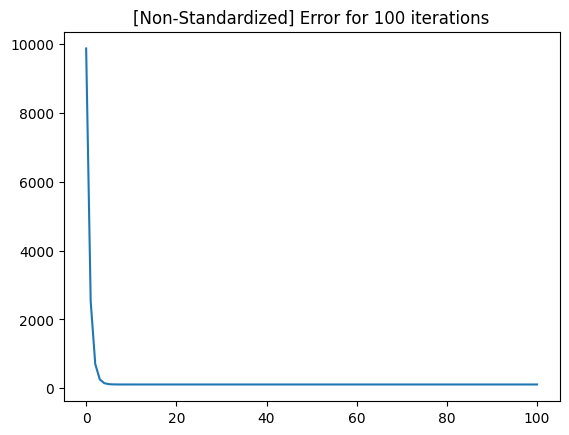

In [ ]:
errorArray = []
m = -0.5
b = 0
for x in range(100):
  errorArray.append(errorCost(final, mid,m,b,len(mid)))

  m = updateM(final, mid,m,b,0.0001)
  b = updateB(final, mid,m,b,0.0001)

errorX = np.linspace(0,100,100)
plt.plot(errorX, errorArray)
plt.title("[Non-Standardized] Error for 100 iterations")
plt.show()

## Non-Standardized 2000 Iterations

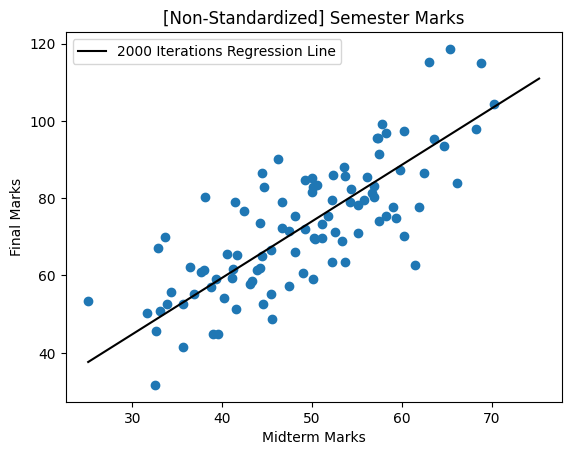

In [ ]:
m = -0.5
b = 0
for x in range(2000):
  m = updateM(final, mid,m,b,0.0001)
  b = updateB(final, mid,m,b,0.0001)


plt.scatter(mid, final)  # Displays standardized midterm and final marks on a scatter plot
sampleX = np.linspace(min(mid),max(mid+5),100)
initRegLine = m * sampleX + b # y = mx+b
plt.plot(sampleX, initRegLine, label = "2000 Iterations Regression Line", color = "black")
plt.title("[Non-Standardized] Semester Marks")
plt.xlabel("Midterm Marks")
plt.ylabel("Final Marks")
plt.legend()
plt.show()

## [Error] Non-Standardized 2000 Iterations

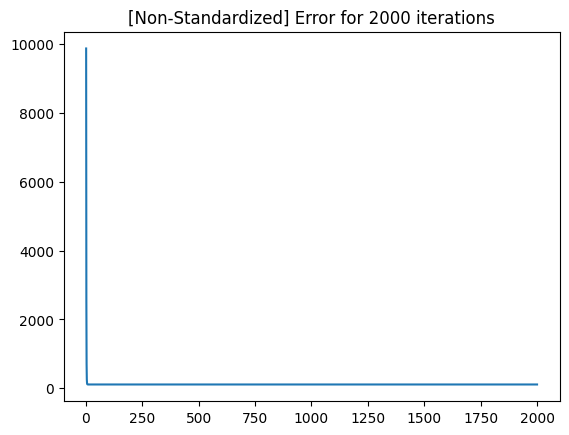

In [ ]:
errorArray = []
m = -0.5
b = 0
for x in range(2000):
  errorArray.append(errorCost(final, mid,m,b,len(mid)))

  m = updateM(final, mid,m,b,0.0001)
  b = updateB(final, mid,m,b,0.0001)

errorX = np.linspace(0,2000,2000)
plt.plot(range(1, 2001), errorArray)
plt.title("[Non-Standardized] Error for 2000 iterations")
plt.show()

## Python API Verification

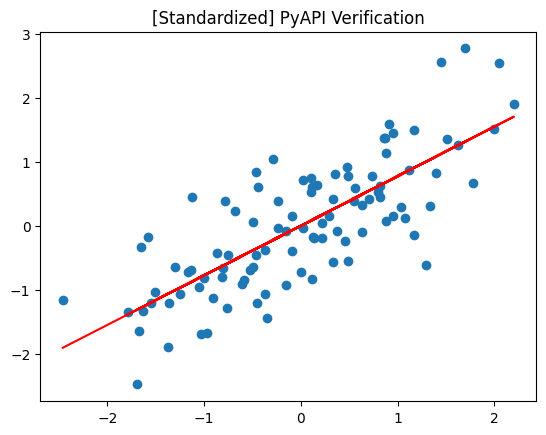

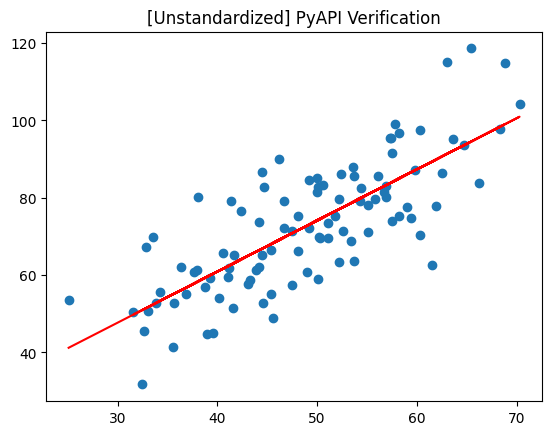

In [ ]:
standardReg = LinearRegression()
fitStandard = standardReg.fit(standardizedMid.values.reshape(-1, 1), standardizedFinal.values.reshape(-1, 1))

nonstandardReg = LinearRegression()
fitUnstandard = nonstandardReg.fit(mid.values.reshape(-1,1), final.values.reshape(-1,1))

plt.scatter(standardizedMid, standardizedFinal, label="Marks")
plt.plot(standardizedMid, fitStandard.predict(standardizedMid.values.reshape(-1, 1)), color='red')
plt.title("[Standardized] PyAPI Verification")
plt.show()

plt.scatter(mid, final, label="Marks")
plt.plot(mid, fitUnstandard.predict(mid.values.reshape(-1, 1)), color='red')
plt.title("[Unstandardized] PyAPI Verification")
plt.show()



## Q1: Write your observation by changing the learning rate to 0.1. Include error plots while explaining your observation.

After analyzing the new error plots and comparing them to the old plots, when a = 0.0001, I observed that increasing the learning rate increased the number of steps the algorithm takes during optimization. With respect to the error plots, the slope of the error decreases significantly and levels out when a = 0.1, whereas the error slope is linear when a = 0.0001. It appears then when a = 0.0001, there aren't enough iterations for the algorithm to find the minimum.

The error plots are below. Note that I was facing some overflow errors but they don't seem to mess up the plots and the codes still run.


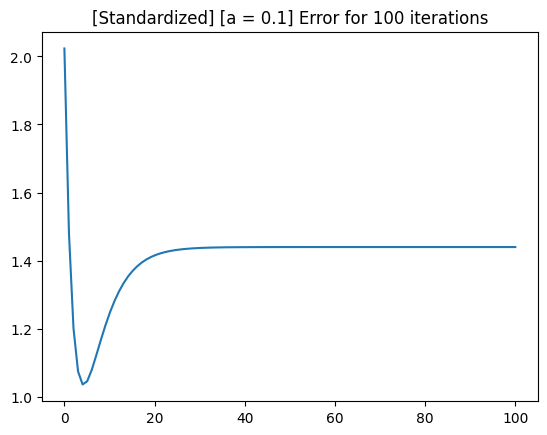

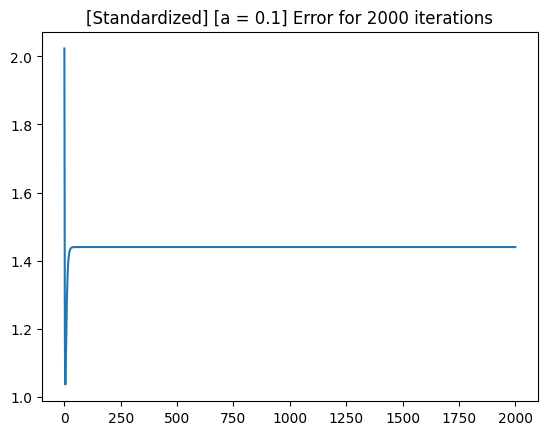

<ipython-input-7-cc8ed81a015c>:5: RuntimeWarning: overflow encountered in double_scalars
  gradM += (-mid[x]*(final[x]-(m*mid[x]+b)))
<ipython-input-7-cc8ed81a015c>:5: RuntimeWarning: invalid value encountered in double_scalars
  gradM += (-mid[x]*(final[x]-(m*mid[x]+b)))


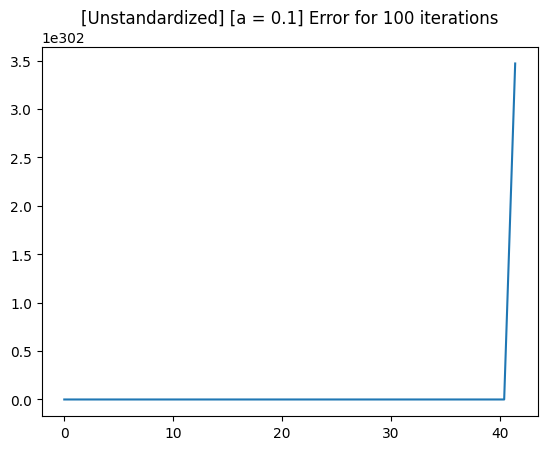

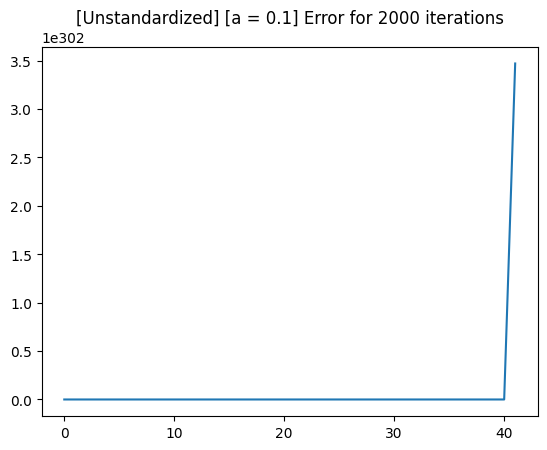

In [ ]:
#Standardized
errorArray = []
m = -0.5
b = 0
for x in range(100):
  errorArray.append(errorCost(standardizedFinal, standardizedMid,m,b,len(standardizedMid)))

  m = updateM(standardizedFinal, standardizedMid,m,b,0.1)
  b = updateB(standardizedFinal, standardizedMid,m,b,0.1)

errorX = np.linspace(0,100,100)
plt.plot(errorX, errorArray)
plt.title("[Standardized] [a = 0.1] Error for 100 iterations")
plt.show()


errorArray = []
m = -0.5
b = 0
for x in range(2000):
  errorArray.append(errorCost(standardizedFinal, standardizedMid,m,b,len(standardizedMid)))

  m = updateM(standardizedFinal, standardizedMid,m,b,0.1)
  b = updateB(standardizedFinal, standardizedMid,m,b,0.1)

errorX = np.linspace(0,2000,2000)
plt.plot(errorX, errorArray)
plt.title("[Standardized] [a = 0.1] Error for 2000 iterations")
plt.show()

# Unstandardized

errorArray = []
m = -0.5
b = 0
for x in range(100):
  errorArray.append(errorCost(final, mid,m,b,len(mid)))

  m = updateM(final, mid,m,b,0.1)
  b = updateB(final, mid,m,b,0.1)

errorX = np.linspace(0,100,100)
plt.plot(errorX, errorArray)
plt.title("[Unstandardized] [a = 0.1] Error for 100 iterations")
plt.show()


errorArray = []
m = -0.5
b = 0
for x in range(2000):
  errorArray.append(errorCost(final, mid,m,b,len(mid)))

  m = updateM(final, mid,m,b,0.1)
  b = updateB(final, mid,m,b,0.1)


errorX = np.linspace(0,2000,2000)
plt.plot(errorX, errorArray)
plt.title("[Unstandardized] [a = 0.1] Error for 2000 iterations")
plt.show()



## Q2: Investigate the effect of standardization.

Standardization of the features resulted with their values centered around the average and scaled it where the standard deviation is equal to 1. This is evident when observing the generated plots where the scales are much smaller than the original plot (midterm vs final marks). Standardization of features helps with processing the data more efficiently.